In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("AQI_2020_to_2025_October.csv")
df.head()

,Date,S.No,City,Air Quality,AQI Value,Prominent Pollutant
0,01-01-2020,January,Ahmedabad,Moderate,178,"PM 2.5, PM 10"
1,01-01-2020,January,Panchkula,Moderate,110,"PM 2.5, PM 10"
2,01-01-2020,January,Palwal,Very Poor,385,"PM 2.5, PM 10"
3,01-01-2020,January,Pali,Moderate,154,"PM 2.5, PM 10"
4,01-01-2020,January,Noida,Severe,438,"PM 2.5, PM 10"


In [13]:
df.shape


(378328, 6)

In [14]:
df.columns


Index(['Date', 'S.No', 'City', 'Air Quality', 'AQI Value',
       'Prominent Pollutant'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378328 entries, 0 to 378327
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Date                 378328 non-null  object
 1   S.No                 378328 non-null  object
 2   City                 378328 non-null  object
 3   Air Quality          378328 non-null  object
 4   AQI Value            378328 non-null  int64 
 5   Prominent Pollutant  378328 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.3+ MB


In [16]:
df.isna().sum()

,0
Date,0
S.No,0
City,0
Air Quality,0
AQI Value,0
Prominent Pollutant,0


# **CLEAN DATA**

In [18]:
# convert date column (change name if different)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# drop rows with no date
df = df.dropna(subset=['Date'])

# **CREATE YEAR & MONTH**

In [19]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# **AQI CATEGORY**

In [27]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.columns

Index(['Date', 'S.No', 'City', 'Air_Quality', 'AQI_Value',
       'Prominent_Pollutant', 'Year', 'Month'],
      dtype='object')

In [33]:
def aqi_category(x):
    if x <= 100:
        return "Good"
    elif x <= 200:
        return "Moderate"
    else:
        return "Poor"

df['AQI_Category'] = df['AQI_Value'].apply(aqi_category)

In [34]:
df[['AQI_Value', 'AQI_Category']].head()

,AQI_Value,AQI_Category
0,178,Moderate
1,110,Moderate
2,385,Poor
3,154,Moderate
4,438,Poor


In [35]:
df['AQI_Category'].value_counts()


,count
AQI_Category,
Good,86650
Moderate,45050
Poor,17042


# **TOP POLLUTED CITIES**

In [30]:
df.groupby('City')['AQI_Value'].mean().sort_values(ascending=False).head(10)


,AQI_Value
City,
Greater_Noida,310.583333
Byrnihat,232.501608
Darbhanga,198.201258
Delhi,195.604291
Greater Noida,191.801724
Ghaziabad,189.468415
Faridabad,188.073298
Sri Ganganagar,183.997110
Bhiwadi,183.264778


# **Top 10 Most Polluted Cities**

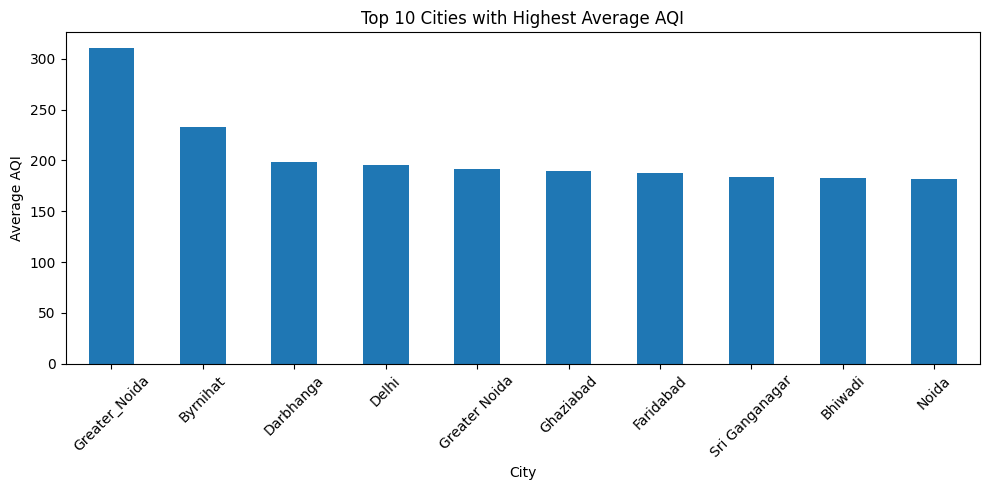

In [31]:
top_cities = (
    df.groupby('City')['AQI_Value']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar')
plt.title("Top 10 Cities with Highest Average AQI")
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **AQI Trend Over Time**

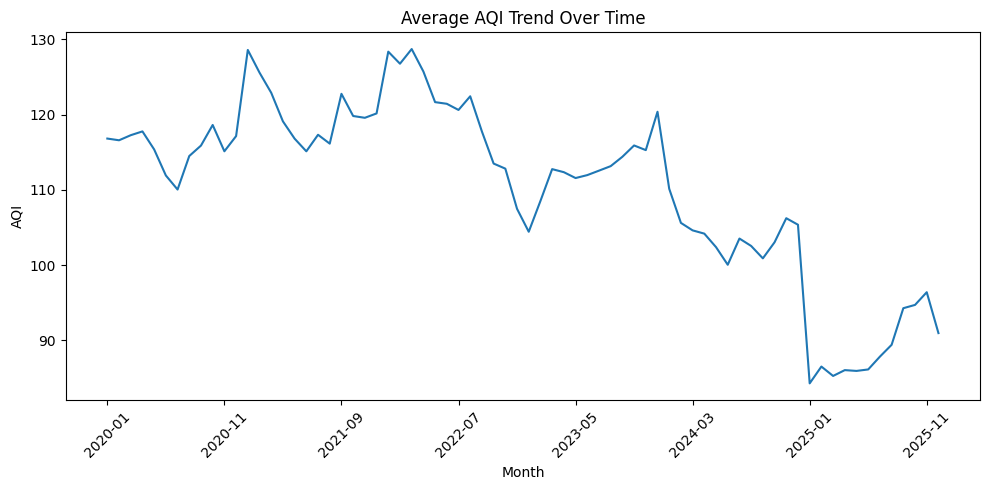

In [32]:
monthly_trend = df.groupby('Month')['AQI_Value'].mean()

plt.figure(figsize=(10,5))
monthly_trend.plot()
plt.title("Average AQI Trend Over Time")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
df.columns

Index(['Date', 'S.No', 'City', 'Air_Quality', 'AQI_Value',
       'Prominent_Pollutant', 'Year', 'Month', 'AQI_Category'],
      dtype='object')

In [39]:
df = df.rename(columns={'S.No': 'S_No'})


In [40]:
df.to_csv("cleaned_aqi_data_v2.csv", index=False)